In [ ]:
## must have these installed - this may take a while

In [ ]:
!conda install -c conda-forge iris

In [ ]:
!conda install -c conda-forge windspharm

In [7]:
import numpy as np
import xarray as xr
import pandas as pd

from windspharm.standard import VectorWind
from windspharm.tools import prep_data, recover_data, order_latdim
from windspharm.examples import example_data_path


In [8]:
def make_sf_vp(filepath):
    data_xr= xr.open_mfdataset(filepath).squeeze()

    uwnd= np.array(data_xr.variables['U'][:].load())
    vwnd= np.array(data_xr.variables['V'][:].load())
    lons = np.array(data_xr.lon)
    lats = np.array(data_xr.lat)

    uwnd, uwnd_info = prep_data(uwnd, 'tyx')
    vwnd, vwnd_info = prep_data(vwnd, 'tyx')

    lats, uwnd, vwnd = order_latdim(lats, uwnd, vwnd)

    w = VectorWind(uwnd, vwnd)

    sf, vp = w.sfvp()
    sf = recover_data(sf, uwnd_info)
    vp = recover_data(vp, uwnd_info)

    sf_xr = xr.DataArray(sf, dims = ['time','lat','lon'], 
                         coords = dict(
                             lon=lons, 
                             lat =lats, 
                             time =pd.to_datetime(np.array(data_xr.time))),
                            name= 'sf')
    vp_xr = xr.DataArray(vp, dims = ['time','lat','lon'], 
                         coords = dict(
                             lon=lons, 
                             lat =lats, 
                             time =pd.to_datetime(np.array(data_xr.time))),
                            name= 'vp')
    return(sf_xr, vp_xr )

In [9]:
sf, vp = make_sf_vp('Example_data.nc')

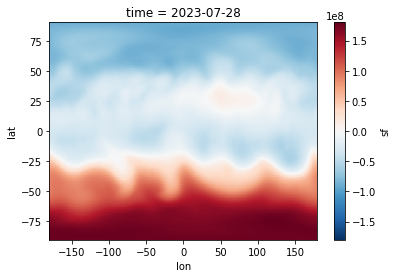

In [10]:
sf.isel(time = 0).plot()